Import packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium as fm

from matplotlib import pyplot as plt

Data has been downloaded from ECDC : https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [3]:
#Import data

data = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-03-17.xlsx')

data.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-17,17,3,2020,5,0,Afghanistan,AF
1,2020-03-16,16,3,2020,6,0,Afghanistan,AF
2,2020-03-15,15,3,2020,3,0,Afghanistan,AF
3,2020-03-11,11,3,2020,3,0,Afghanistan,AF
4,2020-03-08,8,3,2020,3,0,Afghanistan,AF


In [11]:
# Create a cumulative column for cases and deaths for each country 
data['Cumulative_Cases'] = data.groupby(['GeoId'])['Cases'].cumsum()
data['Cumulative_Deaths'] = data.groupby(['GeoId'])['Deaths'].cumsum()
data.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Cumulative_Cases,Cumulative_Deaths
0,2020-03-17,17,3,2020,5,0,Afghanistan,AF,5,0
1,2020-03-16,16,3,2020,6,0,Afghanistan,AF,11,0
2,2020-03-15,15,3,2020,3,0,Afghanistan,AF,14,0
3,2020-03-11,11,3,2020,3,0,Afghanistan,AF,17,0
4,2020-03-08,8,3,2020,3,0,Afghanistan,AF,20,0


##### Look at individual Countries

###### UK

In [65]:
UK_covid = data[data['GeoId'] == 'UK']

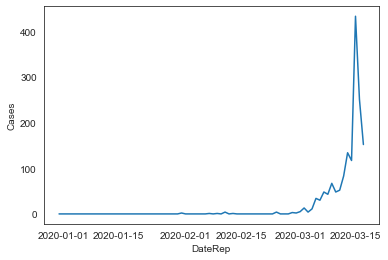

In [66]:
sns.set_style('white')
sns.lineplot(UK_covid['DateRep'],UK_covid['Cases'])

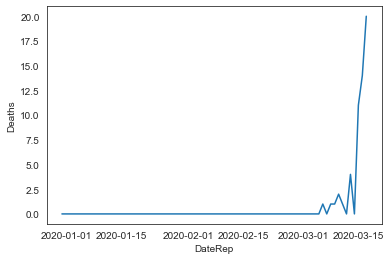

In [82]:
sns.lineplot(UK_covid['DateRep'],UK_covid['Deaths'])

##### Top 5 Countries

In [83]:
top5_covid = data[data['GeoId'].isin(['CN','IT','IR','ES','KR'])]

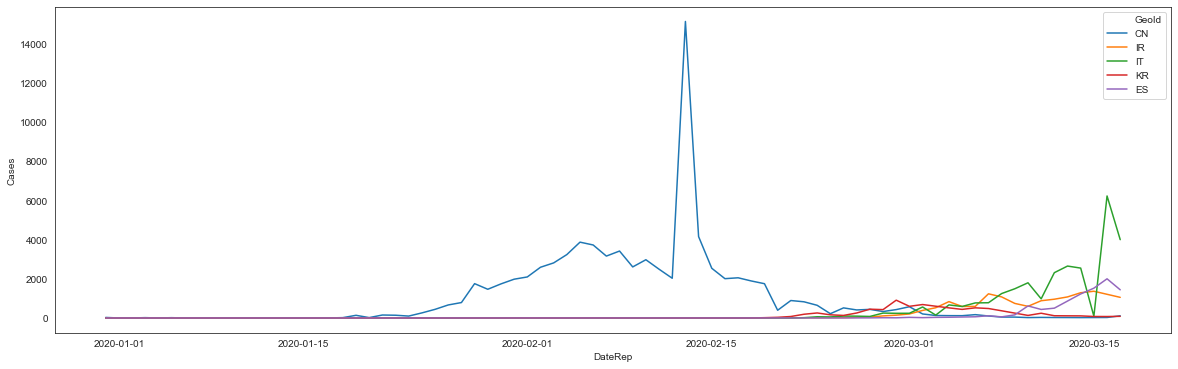

In [84]:
fig,ax = plt.subplots(figsize = (20,6))
sns.lineplot(top5_covid['DateRep'],top5_covid['Cases'],hue = top5_covid['GeoId'])

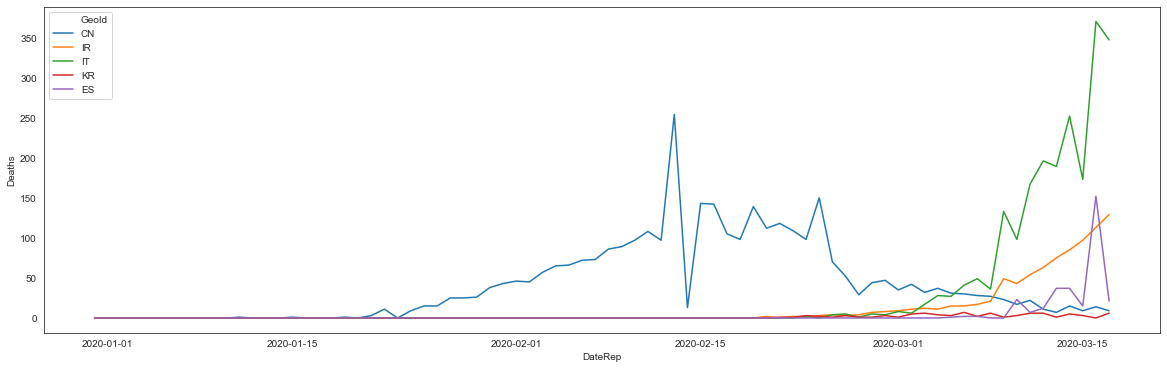

In [85]:
fig,ax = plt.subplots(figsize = (20,6))
sns.lineplot(top5_covid['DateRep'],top5_covid['Deaths'],hue = top5_covid['GeoId'])

###### Top 10 Countries

In [78]:
top10_covid = data[data['GeoId'].isin(['CN','IT','IR','ES','KR','FR','DE','US','CH','UK'])]

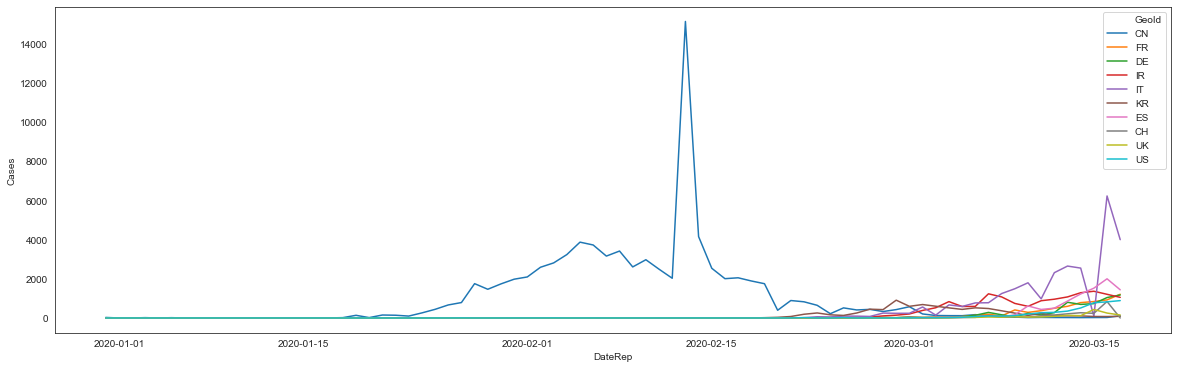

In [81]:
fig,ax = plt.subplots(figsize = (20,6))
sns.lineplot(top10_covid['DateRep'],top10_covid['Cases'],hue = top10_covid['GeoId'])

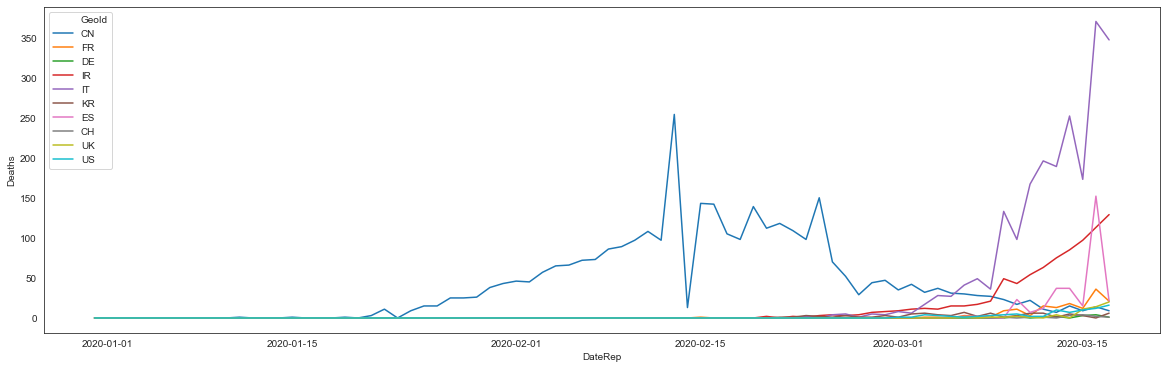

In [86]:
fig,ax = plt.subplots(figsize = (20,6))
sns.lineplot(top10_covid['DateRep'],top10_covid['Deaths'],hue = top10_covid['GeoId'])

<b> Comments </b>
<br>
Will the number of deaths fall like it has in China? Are all other countries reaching their peak now?

In [72]:
# Group by countries and look at total cases per country
newData = data.groupby(['Countries and territories','GeoId'])['Cases','Deaths'].agg('sum')
newdata = pd.DataFrame(newData).reset_index(inplace = True)
newData.head()

,Countries and territories,GeoId,Cases,Deaths
0,Afghanistan,AF,21,0
1,Albania,AL,51,1
2,Algeria,DZ,60,4
3,Andorra,AD,14,0
4,Antigua_and_Barbuda,AG,1,0


In [75]:
newdata1 = newData.sort_values(by='Cases',ascending = False)
newdata1.head(10)

,Countries and territories,GeoId,Cases,Deaths
29,China,CN,81130,3226
67,Italy,IT,27980,2158
63,Iran,IR,14991,853
123,Spain,ES,9191,309
122,South_Korea,KR,8320,81
48,France,FR,6633,148
51,Germany,DE,6012,13
139,United_States_of_America,US,4661,85
128,Switzerland,CH,2200,14
137,United_Kingdom,UK,1543,55


<b> Note </b>:
<br>
Co ordinates of each country : https://www.kaggle.com/parulpandey/world-coordinates

In [26]:
coords = pd.read_csv('world_coordinates.csv')
coords.head()

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


<b>Comments</b> 
<br>

The GeoID for Greece in the coordinates file is GR and United Kingdom is GB. This needs to be altered. 

In [42]:
def newcode(Code):
    if Code == 'GB':
        return 'UK'
    elif Code == 'GR':
        return 'EL'
    else:
        return Code

coords['newcode'] = coords['Code'].apply(newcode)

coords.head()

,Code,Country,latitude,longitude,newcode
0,AD,Andorra,42.546245,1.601554,AD
1,AE,United Arab Emirates,23.424076,53.847818,AE
2,AF,Afghanistan,33.939110,67.709953,AF
3,AG,Antigua and Barbuda,17.060816,-61.796428,AG
4,AI,Anguilla,18.220554,-63.068615,AI


In [47]:
coords[coords['Code'] == 'GR']

,Code,Country,latitude,longitude,newcode
85,GR,Greece,39.074208,21.824312,EL


In [48]:
WorldData = pd.merge(newData,coords,left_on = 'GeoId' , right_on = 'newcode', how = 'left')
WorldData.head()

,Countries and territories,GeoId,Cases,Deaths,Code,Country,latitude,longitude,newcode
0,Afghanistan,AF,21,0,AF,Afghanistan,33.939110,67.709953,AF
1,Albania,AL,51,1,AL,Albania,41.153332,20.168331,AL
2,Algeria,DZ,60,4,DZ,Algeria,28.033886,1.659626,DZ
3,Andorra,AD,14,0,AD,Andorra,42.546245,1.601554,AD
4,Antigua_and_Barbuda,AG,1,0,AG,Antigua and Barbuda,17.060816,-61.796428,AG


In [49]:
#Find data with NA values and drop them
WorldData.isna().sum()

Countries and territories    0
GeoId                        0
Cases                        0
Deaths                       0
Code                         1
Country                      1
latitude                     1
longitude                    1
newcode                      1
dtype: int64

In [50]:
# Find out which rows have NA
null_data = WorldData[WorldData.isnull().any(axis = 1)]
null_data

,Countries and territories,GeoId,Cases,Deaths,Code,Country,latitude,longitude,newcode
26,Cases_on_an_international_conveyance_Japan,JPG11668,696,7,NaN,NaN,NaN,NaN,NaN


<b> Comments </b>

JPG11688 GeoId will be dropped, cannot find country associated with this.

In [51]:
WorldData1 = WorldData.dropna()

##### Show COVID - 19 Cases on world map 

In [89]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [94]:
the_map = fm.Map()
the_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=WorldData1,
    columns=['Countries and territories','Cases'],
    key_on='feature.properties.name',
    fill_color='Blues',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
)
the_map

In [103]:
cases_map = fm.Map(tiles = 'OpenStreetMap')

for latitude, longitude, case, country in zip(WorldData1['latitude'], WorldData1['longitude'], WorldData1['Cases'], WorldData1['Country']):
    fm.CircleMarker([latitude, longitude], radius=case*0.0005,  popup = (str(country) +'\n\n' +'Cases: ' + str(case)), color='yellow', fill_color='red').add_to(cases_map)
cases_map

##### Show COVID - 19 Deaths on world map 

In [58]:
WorldData2 = WorldData1[WorldData1['Deaths'] > 0]
WorldData2.head()

,Countries and territories,GeoId,Cases,Deaths,Code,Country,latitude,longitude,newcode
1,Albania,AL,51,1,AL,Albania,41.153332,20.168331,AL
2,Algeria,DZ,60,4,DZ,Algeria,28.033886,1.659626,DZ
5,Argentina,AR,65,2,AR,Argentina,-38.416097,-63.616672,AR
7,Australia,AU,375,5,AU,Australia,-25.274398,133.775136,AU
8,Austria,AT,1016,3,AT,Austria,47.516231,14.550072,AT


In [61]:
map_dist = fm.Map()

for latitude, longitude, case, country in zip(WorldData2['latitude'], WorldData2['longitude'], WorldData2['Deaths'], WorldData2['Countries and territories']):
    fm.CircleMarker([latitude, longitude], radius=case*0.005,  popup = (str(country) +'\n\n' +'Cases: ' + str(case)), color='red', fill_color='red').add_to(map_dist)
map_dist

In [98]:
death_map = fm.Map()
death_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=WorldData1,
    columns=['Country','Deaths'],
    key_on='feature.properties.name',
    fill_color='Blues',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
)
death_map

In [62]:
WorldData2['Mortality_Rate'] = WorldData2['Deaths']/WorldData2['Cases']
WorldData2.sort_values(by = 'Mortality_Rate', ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Countries and territories,GeoId,Cases,Deaths,Code,Country,latitude,longitude,newcode,Mortality_Rate
125,Sudan,SD,1,1,SD,Sudan,12.862807,30.217636,SD,1.000000
56,Guyana,GY,4,1,GY,Guyana,4.860416,-58.930180,GY,0.250000
54,Guatemala,GT,6,1,GT,Guatemala,15.783471,-90.230759,GT,0.166667
112,San_Marino,SM,102,9,SM,San Marino,43.942360,12.457777,SM,0.088235
103,Philippines,PH,142,12,PH,Philippines,12.879721,121.774017,PH,0.084507
67,Italy,IT,27980,2158,IT,Italy,41.871940,12.567380,IT,0.077127
64,Iraq,IQ,124,9,IQ,Iraq,33.223191,43.679291,IQ,0.072581
2,Algeria,DZ,60,4,DZ,Algeria,28.033886,1.659626,DZ,0.066667
63,Iran,IR,14991,853,IR,Iran,32.427908,53.688046,IR,0.056901
29,China,CN,81130,3226,CN,China,35.861660,104.195397,CN,0.039763


In [105]:
mortality_map = fm.Map()

for latitude, longitude, case, country in zip(WorldData2['latitude'], WorldData2['longitude'], WorldData2['Mortality_Rate'], WorldData2['Countries and territories']):
    fm.CircleMarker([latitude, longitude], radius=case,  popup = (str(country) +'\n\n' +'Cases: ' + str(case)), color='green', fill_color='green').add_to(mortality_map)
mortality_map

In [104]:
mortality_map = fm.Map()
mortality_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=WorldData2,
    columns=['Country','Mortality_Rate'],
    key_on='feature.properties.name',
    fill_color='Blues',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
)
mortality_map

## Part 2 

Analysis using kaggle dataset https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [126]:
deaths = pd.read_csv('time_series_covid_19_deaths.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [128]:
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,23,24,24,24,26,26,26,35


In [129]:
deaths=pd.melt(deaths,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Deaths')
deaths.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
deaths['Date']=pd.to_datetime(deaths['Date'])
deaths.head()

,State,Country,Lat,Long,Date,Deaths
0,NaN,Thailand,15.0000,101.0000,2020-01-22,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0


In [130]:
confirmed=pd.melt(confirmed,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Confirmed')
confirmed.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
confirmed['Date']=pd.to_datetime(deaths['Date'])
confirmed.head()

,State,Country,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0


In [131]:
recovered=pd.melt(recovered,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Recovered')
recovered.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
recovered['Date']=pd.to_datetime(deaths['Date'])
recovered.head()

,State,Country,Lat,Long,Date,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0


In [133]:
recovered.shape

(23426, 6)

In [134]:
deaths.shape

(23426, 6)

In [135]:
confirmed.shape

(23426, 6)

In [136]:
merge = pd.merge(recovered,deaths)
merge = pd.merge(merge, confirmed)
data = merge
data.head()

,State,Country,Lat,Long,Date,Recovered,Deaths,Confirmed
0,NaN,Thailand,15.0000,101.0000,2020-01-22,0,0,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,0,0,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [138]:
data.shape

(23426, 8)

Group By Country

In [145]:
CountryData = data.groupby(['Country'])['Recovered','Deaths','Confirmed'].agg('sum')
CountryData = pd.DataFrame(CountryData).reset_index()

In [151]:
CountryData.sort_values(by = 'Confirmed',ascending = False, inplace = True)

Find the top 10 countries for confirmed cases

In [152]:
ConfirmedTop = CountryData.head(10)
ConfirmedTop

,Country,Recovered,Deaths,Confirmed
27,China,1154898,90221,2800426
68,Italy,9904,6773,118103
75,"Korea, South",2849,733,104758
64,Iran,24019,3466,88374
123,Spain,1242,538,21519
46,France,270,395,20140
33,Cruise Ship,1594,123,19868
50,Germany,485,26,19196
135,US,203,317,11890
70,Japan,1388,168,9153


Text(0.5, 1.0, 'Top 10 countries with COVID-19 cases')

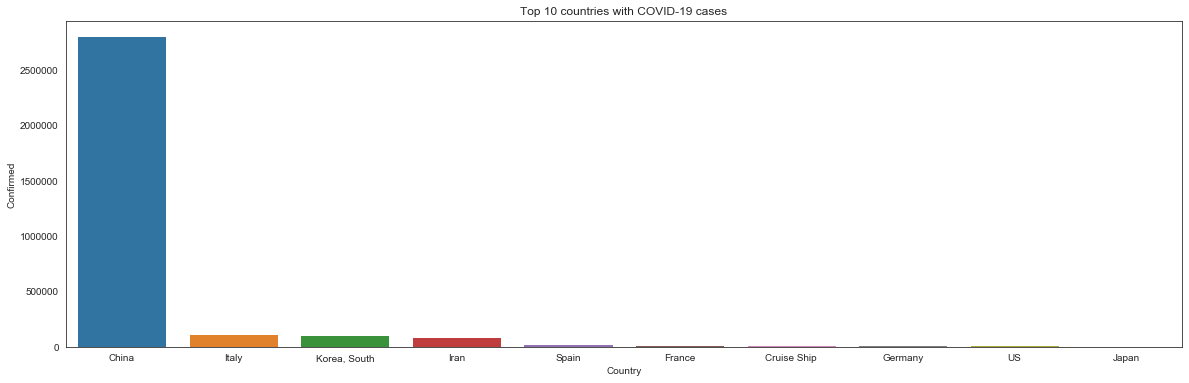

In [157]:
fig,ax = plt.subplots(figsize = (20,6))
sns.barplot(x= ConfirmedTop['Country'], y= ConfirmedTop['Confirmed'])
plt.title('Top 10 countries with COVID-19 cases')

In [159]:
CountryData.sort_values(by = 'Deaths',ascending = False, inplace = True)
DeathsTop = CountryData.head(10)

Text(0.5, 1.0, 'Top 10 countries with COVID-19 deaths')

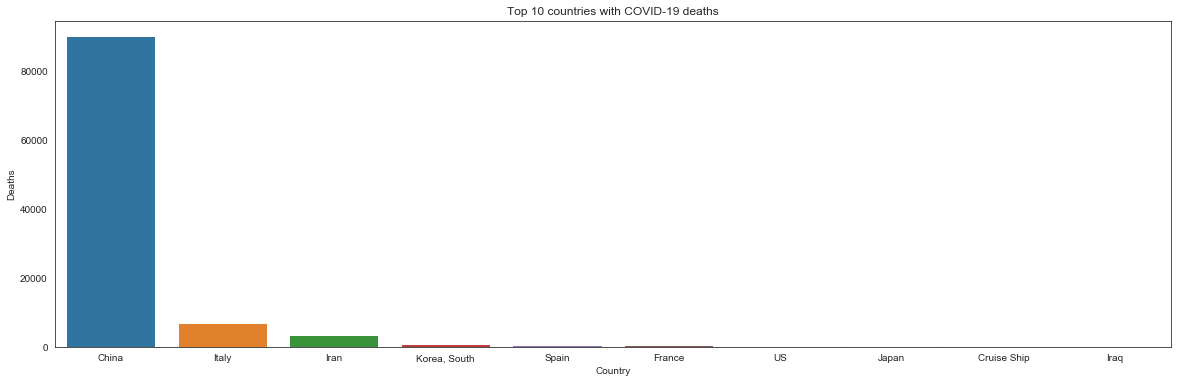

In [160]:
fig,ax = plt.subplots(figsize = (20,6))
sns.barplot(x= DeathsTop['Country'], y= DeathsTop['Deaths'])
plt.title('Top 10 countries with COVID-19 deaths')

In [161]:
CountryData.sort_values(by = 'Recovered',ascending = False, inplace = True)
RecoveredTop = CountryData.head(10)

Text(0.5, 1.0, 'Top 10 countries with COVID-19 Recovered')

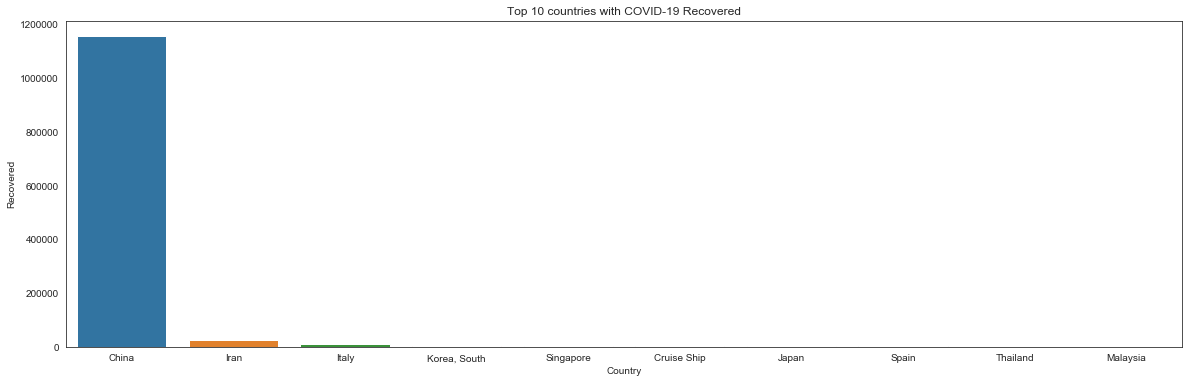

In [162]:
fig,ax = plt.subplots(figsize = (20,6))
sns.barplot(x= RecoveredTop['Country'], y= RecoveredTop['Recovered'])
plt.title('Top 10 countries with COVID-19 Recovered')